In [391]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from sklearn import preprocessing

In [410]:
#Ustalenie wartości parametrów czasu 
t_0 = 0; t_end = 300; length = 300

#Określenie osi czasu 
t = np.linspace(t_0,t_end,length)
dt = np.mean(np.diff(t))

#Wielkość populacji 
N = 100 

#Ustalenie wielkosci kazdej z grup w czasie, wprowadzenie dziedziny czasu 
#S - Susceptible |  I - Infectious |  R - Recovered
S,I,R = np.zeros(length), np.zeros(length), np.zeros(length); 
Sd,Id,Rd = np.zeros(length), np.zeros(length), np.zeros(length); 
Id[0] = 1
Sd = N - Id  - Rd

#Liczba zarażonych w chwili początkowej 
I[0] = 1 

#Założenia modelu SIR, S + I + R = N 
S = N - I - R

#Współczynniki modelu SIR 
#beta - współczynnik zaraźliwości | gamma - współczynnik ozdrowienia 
beta, gamma = 0.5, 1./10

Następnie realizowane jest uwzględnienie komponenty stochastycznej dla modelu SIR, gdzie rozwiązywanie będą stochastyczne równania różniczkowe (ang. Stochastic Diffrential Equations (SDE)): 

$dX_t = a * (X_t)dt + b(X_t)dW_t$

,gdzie:
a - czynnik dryfu 
b - czynnik dyfuzji 
$dW_t$ - proces Wienera  


In [426]:
#Określenie wartości parametru sigma 
SIGMAS = 0.5
sigmaS = np.zeros(length)
sigmaS = sigmaS + SIGMA

SIGMAI = 0.5
sigmaI = np.zeros(length)
sigmaI = sigmaI + SIGMA

SIGMAR = 0.5
sigmaR = np.zeros(length)
sigmaR = sigmaR + SIGMA

#Ustalenie założeń modelu SIR zgodnie z powyższym równaniem 
#Dla S 
driftS = lambda S,t: -beta * S * I / N       
diffusionS = lambda S,t: sigmaS
#Dla I 
driftI = lambda I,t: beta * S * I /N - gamma * I     
diffusionI = lambda I,t: sigmaI
#Dla R 
driftR = lambda R,t: gamma * I      
diffusionR = lambda R,t: sigmaR     


#Ustalenie założeń modelu SIR zgodnie z powyższym równaniem 
#Dla Sd 
driftSd = lambda Sd,t: -beta * Sd * Id / N       
diffusionS = lambda Sd,t: sigmaS
#Dla Id 
driftId = lambda Id,t: beta * Sd * Id /N - gamma * Id     
diffusionI = lambda Id,t: sigmaI
#Dla Rd 
driftRd = lambda Rd,t: gamma * Id      
diffusionR = lambda Rd,t: sigmaR 

Zgodnie z założeniami SDE czas został podzielony na części o długości dt oraz dla każdego kroku czasowego oraz każdej grupy modelu SIR zrealizowano równanie: 

$Y_n = Y_{n-1} + a(Y_{n-1})\Delta t + b(Y_{n-1})\Delta W$

In [427]:
#szum
noise = np.random.normal(loc=0.0,scale=1,size=length)*np.sqrt(dt)

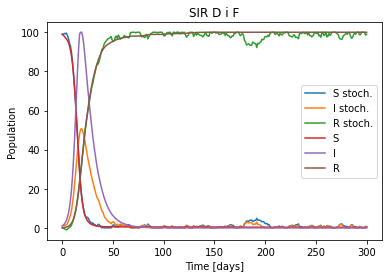

In [429]:
#Rozwiązanie powyższego równania dla każdej grupy modelu SIR 
for i in range(1,length):
    S[i] = S[i-1] + (driftS(S[i-1],i*dt)[i-1])*dt + (diffusionS(S,i*dt)[i-1])*noise[i-1]
    I[i] = I[i-1] + (driftI(I[i-1],i*dt)[i-1])*dt + (diffusionI(I[i-1],i*dt)[i-1])*noise[i-1]
    R[i] = R[i-1] + (driftR(R[i-1],i*dt)[i-1])*dt + (diffusionR(R[i-1],i*dt)[i-1])*noise[i-1]        
    Sd[i] = Sd[i-1] + (driftS(Sd[i-1],i*dt)[i-1])*dt 
    Id[i] = Id[i-1] + (driftI(Id[i-1],i*dt)[i-1])*dt 
    Rd[i] = Rd[i-1] + (driftR(Rd[i-1],i*dt)[i-1])*dt     
    
    if S[i] < 0:
        S[i] = 0;
    if I[i] < 0:
        I[i] = 0;
    
    if Rd[i] > 100:
        Rd[i] =100;
    
    if Id[i] > 100:
        Id[i] = 100;
        
    
        
    
    #Unormowanie ze względu na to, że założenie zamkniętego układu. 
    tmp = S[i]+I[i]+R[i]
    S[i] *= 100/tmp
    I[i] *= 100/tmp
    R[i] *= 100/tmp
data = [S,I,R]
S = N - I - R 



fig, ax = plt.subplots()
ax.plot(t, data[0], label = 'S stoch.')
ax.plot(t, data[1], label = 'I stoch.')
ax.plot(t, data[2], label = 'R stoch.')
ax.plot(t, Sd, label = 'S ')
ax.plot(t, Id, label = 'I ')
ax.plot(t, Rd, label = 'R ')
ax.set_xlabel("Time [days]")
ax.set_ylabel("Population")
plt.title('SIR D i F')
plt.legend(loc="best")
plt.savefig('DF.png')
plt.show()